In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных из репозитория

In [3]:
# train
train = pd.read_csv('https://github.com/Quantanomo/data_sets/raw/master/CAX_MortgageModeling_Train.csv')
train.head(2)


,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED


In [4]:
# test
test = pd.read_csv('https://github.com/Quantanomo/data_sets/raw/master/CAX_MortgageModeling_Test.csv')
test.head()

,Unique_ID,MORTGAGE NUMBER,PROPERTY VALUE,MORTGAGE PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE AMOUNT,RATE,...,PROPERTY TYPE,TERM,FSA,AGE RANGE,GENDER,INCOME,INCOME TYPE,NAICS CODE,CREDIT SCORE,RESULT
0,CAX_Test_1,45643,430000,1861,34.51,75.00,35.60,360,322500.0,4.25,...,High Rise,24,M9B,45-49,Male,76000,8,23,834,NaN
1,CAX_Test_2,45644,676000,1032,37.18,55.51,37.50,360,375000.0,5.00,...,Semi-Detached,12,M3N,55-59,Female,75000,2,56,804,NaN
2,CAX_Test_3,45645,418000,949,23.30,79.90,32.88,360,334000.0,4.75,...,Single Detached,60,K2H,30-34,Male,70000,8,72,730,NaN
3,CAX_Test_4,45646,693000,3059,42.45,80.00,42.59,360,554400.0,4.25,...,Single Detached,24,L3R,Under 25,Female,90000,2,44-45,786,NaN
4,CAX_Test_5,45647,324000,1554,42.97,75.00,43.48,360,243000.0,4.00,...,Single Detached,12,L2S,35-39,Male,48000,2,56,787,NaN


In [5]:
train.dtypes

Unique_ID             object
MORTGAGE NUMBER        int64
PROPERTY VALUE         int64
MORTGAGE PAYMENT       int64
GDS                  float64
LTV                  float64
TDS                  float64
AMORTIZATION           int64
MORTGAGE AMOUNT      float64
RATE                 float64
MORTGAGE PURPOSE      object
PAYMENT FREQUENCY     object
PROPERTY TYPE         object
TERM                   int64
FSA                   object
AGE RANGE             object
GENDER                object
INCOME                 int64
INCOME TYPE            int64
NAICS CODE            object
CREDIT SCORE           int64
RESULT                object
dtype: object

In [6]:
# Переименую колонки для удобного обращения к ним

train = train.rename(columns = {
    'MORTGAGE NUMBER': 'MORTGAGE_NUMBER',
    'PROPERTY VALUE': 'PROPERTY_VALUE',
    'MORTGAGE PAYMENT': 'MORTGAGE_PAYMENT',
    'MORTGAGE PURPOSE': 'MORTGAGE_PURPOSE',
    'PAYMENT FREQUENCY': 'PAYMENT_FREQUENCY',
    'MORTGAGE AMOUNT': 'MORTGAGE_AMOUNT',
    'PROPERTY TYPE': 'PROPERTY_TYPE',
    'AGE RANGE': 'AGE_RANGE',
    'INCOME TYPE': 'INCOME_TYPE',
    'NAICS CODE': 'NAICS_CODE',
    'CREDIT SCORE': 'CREDIT_SCORE'
})

train.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,FUNDED
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,FUNDED


In [7]:
test = test.rename(columns = {
    'MORTGAGE NUMBER': 'MORTGAGE_NUMBER',
    'PROPERTY VALUE': 'PROPERTY_VALUE',
    'MORTGAGE PAYMENT': 'MORTGAGE_PAYMENT',
    'MORTGAGE AMOUNT': 'MORTGAGE_AMOUNT',
    'MORTGAGE PURPOSE': 'MORTGAGE_PURPOSE',
    'PAYMENT FREQUENCY': 'PAYMENT_FREQUENCY',
    'PROPERTY TYPE': 'PROPERTY_TYPE',
    'AGE RANGE': 'AGE_RANGE',
    'INCOME TYPE': 'INCOME_TYPE',
    'NAICS CODE': 'NAICS_CODE',
    'CREDIT SCORE': 'CREDIT_SCORE'
})

test.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
0,CAX_Test_1,45643,430000,1861,34.51,75.00,35.6,360,322500.0,4.25,...,High Rise,24,M9B,45-49,Male,76000,8,23,834,NaN
1,CAX_Test_2,45644,676000,1032,37.18,55.51,37.5,360,375000.0,5.00,...,Semi-Detached,12,M3N,55-59,Female,75000,2,56,804,NaN


In [8]:
# Зависимый признак RESULT перекодирую в 1,0
train = pd.concat([train, pd.get_dummies(train['RESULT'], prefix ='RESULT')], axis=1)

train = train.drop(['RESULT', 'RESULT_NOT FUNDED'], axis=1)
train.head(2)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT_FUNDED
0,CAX_Train_1,1,900000,5429,61.98,65.00,71.63,360,1040000.0,4.0,...,Single Detached,12,L4C,Under 25,Male,108000,8,44-45,681,1
1,CAX_Train_2,2,386000,2179,35.22,74.29,40.65,360,390000.0,4.5,...,Single Detached,12,L9T,70 and over,Male,78000,2,56,710,1


### EDA

### Посмотрю на размерность данных

In [9]:
# Посмотрим на размер данных
train.shape, test.shape

((45642, 22), (15214, 22))

Вывод: фреймы одинаковы по своей структуре

### Проверю пропущенные значения и посмотрю на тип данных

In [10]:
# Функция принимает датафрейм и выдает кол-во и процент пропущенных значений и тип данных
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

# train
missing_data(train)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT_FUNDED
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,int64,int64,int64,float64,float64,float64,int64,float64,float64,...,object,int64,object,object,object,int64,int64,object,int64,uint8


In [11]:
# test
missing_data(test)

,Unique_ID,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,...,PROPERTY_TYPE,TERM,FSA,AGE_RANGE,GENDER,INCOME,INCOME_TYPE,NAICS_CODE,CREDIT_SCORE,RESULT
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15214
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
Types,object,int64,int64,int64,float64,float64,float64,int64,float64,float64,...,object,int64,object,object,object,int64,int64,object,int64,float64


Вывод: Пропущенных значений нет (за исключением искомого значения в тестовом наборе). В наборах присутствуют количественные и номинативные признаки

### Посмотрю на характеристики количественных признаков

In [12]:
# train
train.describe()

,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,TERM,INCOME,INCOME_TYPE,CREDIT_SCORE,RESULT_FUNDED
count,45642.00000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,4.564200e+04,45642.000000,45642.000000,4.564200e+04,45642.000000,45642.000000,45642.000000
mean,22821.50000,5.826110e+05,2392.148043,2.138033e+02,70.632932,4.125670e+02,355.309583,4.255704e+05,4.651149,15.286578,1.251093e+05,5.315017,662.662811,0.789251
std,13175.85483,4.382082e+05,1688.208721,3.263766e+04,11.566444,6.425859e+04,18.011798,3.020469e+05,0.642371,7.443857,1.149974e+05,3.267761,132.818234,0.407845
min,1.00000,1.400000e+04,141.000000,-3.704000e+01,6.667000,-1.070000e+01,60.000000,1.500000e+04,2.500000,6.000000,1.000000e+03,-1.000000,0.000000,0.000000
25%,11411.25000,3.400000e+05,1406.000000,1.984000e+01,65.000000,3.284000e+01,360.000000,2.459250e+05,4.250000,12.000000,6.800000e+04,2.000000,623.000000,1.000000
50%,22821.50000,4.770000e+05,2033.000000,2.921000e+01,75.000000,3.830000e+01,360.000000,3.575000e+05,4.500000,12.000000,9.700000e+04,6.000000,677.000000,1.000000
75%,34231.75000,6.850000e+05,2866.000000,3.587000e+01,80.000000,4.217000e+01,360.000000,5.120000e+05,5.000000,12.000000,1.450000e+05,8.000000,736.000000,1.000000
max,45642.00000,1.800000e+07,46479.000000,6.872300e+06,95.000000,1.346256e+07,480.000000,7.500000e+06,10.000000,60.000000,3.860000e+06,20.000000,899.000000,1.000000


In [13]:
# test
test.describe()

,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,TERM,INCOME,INCOME_TYPE,CREDIT_SCORE,RESULT
count,15214.000000,1.521400e+04,15214.000000,1.521400e+04,15214.000000,1.521400e+04,15214.000000,1.521400e+04,15214.000000,15214.000000,1.521400e+04,15214.000000,15214.00000,0.0
mean,53249.500000,5.790442e+05,2384.620350,2.306921e+03,70.748041,2.754330e+03,355.208361,4.237224e+05,4.643010,15.405022,1.241874e+05,5.324438,663.11680,NaN
std,4392.047833,4.175277e+05,1608.625935,1.933853e+05,11.580747,2.092715e+05,18.421023,2.898901e+05,0.633511,7.531778,1.110122e+05,3.303275,133.94336,NaN
min,45643.000000,3.600000e+04,208.000000,-4.878000e+01,6.900000,-4.204000e+01,120.000000,3.338800e+02,2.500000,6.000000,1.000000e+03,-1.000000,0.00000,NaN
25%,49446.250000,3.370000e+05,1397.000000,1.997000e+01,65.000000,3.293000e+01,360.000000,2.441450e+05,4.250000,12.000000,6.700000e+04,2.000000,624.00000,NaN
50%,53249.500000,4.740000e+05,2025.000000,2.930000e+01,75.000000,3.836000e+01,360.000000,3.562500e+05,4.500000,12.000000,9.700000e+04,6.000000,678.00000,NaN
75%,57052.750000,6.800000e+05,2850.000000,3.610000e+01,80.000000,4.222000e+01,360.000000,5.111850e+05,5.000000,12.000000,1.440000e+05,8.000000,736.00000,NaN
max,60856.000000,7.500000e+06,25032.000000,2.138046e+07,93.325000,2.274796e+07,480.000000,4.760000e+06,10.000000,60.000000,2.125000e+06,19.000000,899.00000,NaN


MORTGAGE NUMBER (Номер ипотеки) - ни о чем нам не говорит. Судя по номерам, я исследую 2/3 (train) и 1/3 (test) одного датафрейма (номера ипотек с 1 по 60856)

PROPERTY VALUE (Стоимость имущества) - Среднее, медиана и sd в наборах примерно одинаковы

MORTGAGE PAYMENT (Выплата по ипотеке) - Среднее, медиана и sd в наборах примерно одинаковы

GDS (Годовые расходы на жилье / Годовой доход) - Медианы одинаковы, средние и sd различны

LTV (сумма ипотеки / оценочная стоимость недвижимости) - Среднее, медиана и sd в наборах примерно одинаковы

TDS (Все годовые расходы / Годовой доход) - Схоже по параметрам с GDS

AMORTIZATION (Амортизация в месяцах) - Амортизация в наборах одинакова

MORTGAGE AMOUNT	(Сумма ипотеки в $) - Среднее, медиана и sd в наборах примерно одинаковы

RATE (Процентная ставка) - Ставки в наборах равны

TERM (Срок ипотеки) - Сроки ипотеки одинаковы

INCOME (Доходы) - Доходы одинаковы

INCOME TYPE (Тип дохода) - Это статусы занятости (номинативная переменная)

CREDIT SCORE (Рейтинг кредитного бюро) - рейтинги в наборах похожи

----------- НОМИНАТИВНЫЕ ПРИЗНАКИ

PROPERTY TYPE (Тип недвижимости)

FSA (Почтовый индекс)

MORTGAGE PURPOSE (Цель ипотеки)

PAYMENT FREQUENCY (Частота платежей)

AGE RANGE (Возрастная категория)

GENDER (Пол)

NAICS CODE (Категория работы)

### Посмотрю на распределения номинативных признаков

#### INCOME TYPE (Тип дохода) 

In [14]:
train.groupby('INCOME_TYPE')['Unique_ID'].nunique()

INCOME_TYPE
-1       123
 1       186
 2     19525
 3       749
 4        79
 5       579
 6      1693
 7       191
 8     21724
 9        76
 10       21
 11       38
 12       95
 13        1
 14        3
 15       47
 16       19
 17       74
 18        7
 19      410
 20        2
Name: Unique_ID, dtype: int64

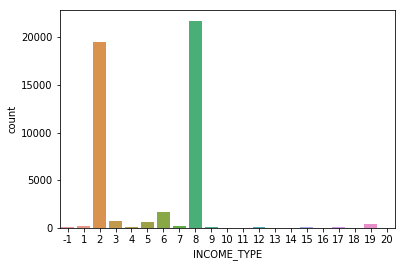

In [15]:
sns.countplot(train['INCOME_TYPE'])

#### PROPERTY TYPE (Тип недвижимости)

In [16]:
train.groupby('PROPERTY_TYPE')['Unique_ID'].nunique()

PROPERTY_TYPE
Duplex                     469
Fourplex                   118
High Rise                 5909
Semi-Detached             4227
Single Detached          29377
Townhouse Condominium     2309
Townhouse Freehold        3040
Triplex                    193
Name: Unique_ID, dtype: int64

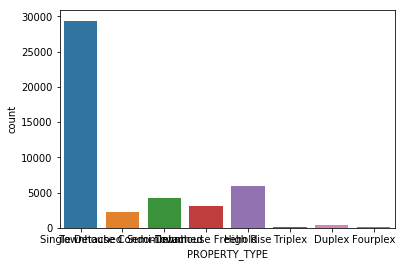

In [17]:
sns.countplot(train['PROPERTY_TYPE'])

#### FSA (Почтовый индекс)

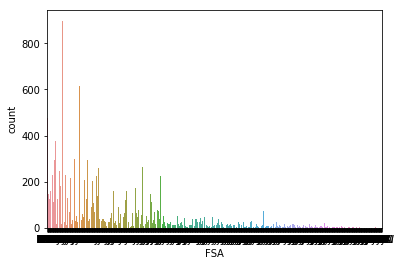

In [158]:
sns.countplot(train['FSA'])

#### MORTGAGE PURPOSE (Цель ипотеки)

In [18]:
train.groupby('MORTGAGE_PURPOSE')['Unique_ID'].nunique()

MORTGAGE_PURPOSE
Purchase     24419
Refinance    21223
Name: Unique_ID, dtype: int64

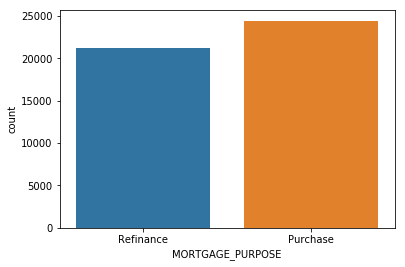

In [19]:
sns.countplot(train['MORTGAGE_PURPOSE'])

#### PAYMENT FREQUENCY (Частота платежей)

In [20]:
train.groupby('PAYMENT_FREQUENCY')['Unique_ID'].nunique()

PAYMENT_FREQUENCY
Bi-Weekly                 1803
Bi-Weekly Accelerated     1047
Monthly                  42785
Semi-Monthly                 4
Weekly                       2
Weekly Accelerated           1
Name: Unique_ID, dtype: int64

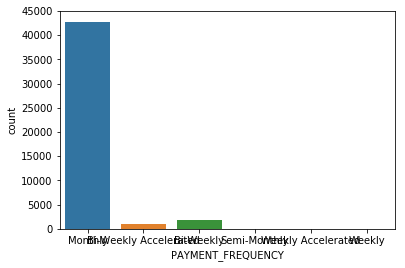

In [21]:
sns.countplot(train['PAYMENT_FREQUENCY'])

#### AGE RANGE (Возрастная категория)

In [22]:
train.groupby('AGE_RANGE')['Unique_ID'].nunique()

AGE_RANGE
25-29          2534
30-34          4551
35-39          5818
40-44          6877
45-49          7645
50-54          6801
55-59          4710
60-64          2816
65-69          1678
70 and over    1374
Under 25        838
Name: Unique_ID, dtype: int64

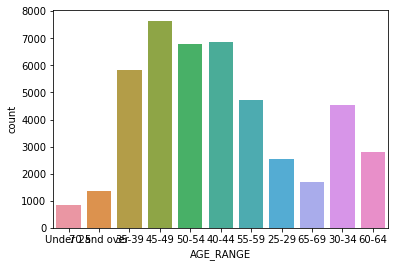

In [23]:
sns.countplot(train['AGE_RANGE'])

#### GENDER (Пол)

In [24]:
train.groupby('GENDER')['Unique_ID'].nunique()

GENDER
Female     14375
Male       24849
Unknown     6418
Name: Unique_ID, dtype: int64

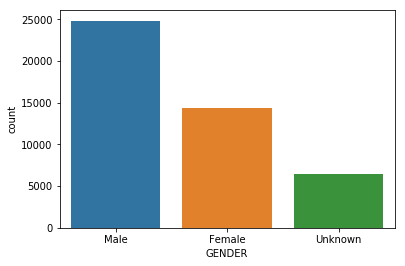

In [25]:
sns.countplot(train['GENDER'])

#### NAICS CODE (Категория работы)

In [26]:
train.groupby('NAICS_CODE')['Unique_ID'].nunique()

NAICS_CODE
11         304
22          63
23        5092
31-33      982
42          98
44-45     3622
48-49     3305
51         145
52        1022
53        2473
54        5326
55         246
56       11245
61        1382
62        2166
71         640
72        2722
81        4296
92         513
Name: Unique_ID, dtype: int64

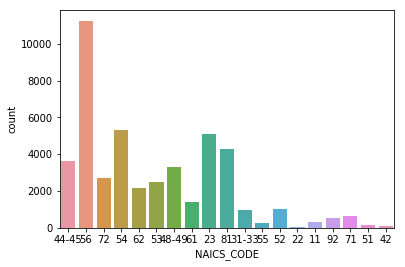

In [27]:
sns.countplot(train['NAICS_CODE'])

#### RESULT

In [28]:
train.groupby('RESULT_FUNDED')['Unique_ID'].nunique()

RESULT_FUNDED
0     9619
1    36023
Name: Unique_ID, dtype: int64

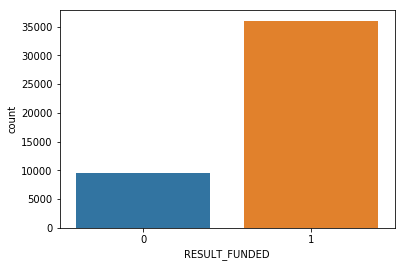

In [29]:
sns.countplot(train['RESULT_FUNDED'])

Выводы:
ВАЖНО! в GENDER есть нераспознанные значения - их нужно будет заменить. Как? (вижу варианты: заменить случайно в пропорциях, либо попытаться предсказать, либо удалить) 

Закодируй номинативные признаки, в т.ч. тот что попал в int

### Посмотрю на корреляцию признаков

In [30]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,MORTGAGE_NUMBER,PROPERTY_VALUE,MORTGAGE_PAYMENT,GDS,LTV,TDS,AMORTIZATION,MORTGAGE_AMOUNT,RATE,TERM,INCOME,INCOME_TYPE,CREDIT_SCORE,RESULT_FUNDED
MORTGAGE_NUMBER,1,0.00920689,0.0122952,-0.000926366,0.00950168,-0.000667139,0.00270608,0.0119475,-0.00333278,0.00550368,0.0149299,4.74897e-05,-0.000292342,0.0046391
PROPERTY_VALUE,0.00920689,1,0.876,0.0123925,-0.0731873,0.0121879,0.104812,0.887418,-0.0562836,-0.0649185,0.491104,0.162965,0.103142,-0.0793402
MORTGAGE_PAYMENT,0.0122952,0.876,1,0.00799972,0.125719,0.00773164,0.105614,0.956259,-0.0171665,-0.0740973,0.540807,0.170579,0.0987144,-0.0875398
GDS,-0.000926366,0.0123925,0.00799972,1,-0.0112255,0.990829,0.00147916,0.00580295,0.00360209,-0.00252105,-0.00549786,0.00179749,0.000983971,0.0029328
LTV,0.00950168,-0.0731873,0.125719,-0.0112255,1,-0.0109746,0.159338,0.157422,-0.210382,-0.0215176,0.129996,-0.00755179,0.150248,0.0632729
TDS,-0.000667139,0.0121879,0.00773164,0.990829,-0.0109746,1,0.00151869,0.00553614,0.00448233,-0.0025786,-0.00499846,0.00196627,0.0015509,0.00300027
AMORTIZATION,0.00270608,0.104812,0.105614,0.00147916,0.159338,0.00151869,1,0.139797,-0.145285,-0.0362141,0.05486,0.0281865,0.0709366,0.0132513
MORTGAGE_AMOUNT,0.0119475,0.887418,0.956259,0.00580295,0.157422,0.00553614,0.139797,1,-0.108087,-0.06824,0.549262,0.175093,0.128103,-0.0721675
RATE,-0.00333278,-0.0562836,-0.0171665,0.00360209,-0.210382,0.00448233,-0.145285,-0.108087,1,-0.00584571,-0.0149874,-0.0568752,-0.265223,-0.0839102
TERM,0.00550368,-0.0649185,-0.0740973,-0.00252105,-0.0215176,-0.0025786,-0.0362141,-0.06824,-0.00584571,1,-0.0467211,0.0118857,-0.0101652,0.0163218


In [31]:
# Посмотрю топ отрицательных корреляций
corr.unstack().sort_values().drop_duplicates().head()

CREDIT_SCORE     RATE               -0.265223
LTV              RATE               -0.210382
AMORTIZATION     RATE               -0.145285
MORTGAGE_AMOUNT  RATE               -0.108087
RESULT_FUNDED    MORTGAGE_PAYMENT   -0.087540
dtype: float64

In [32]:
# Посмотрю топ положительных корреляций
corr.unstack().sort_values(ascending=False).drop_duplicates().head(9)

RESULT_FUNDED     RESULT_FUNDED       1.000000
TDS               GDS                 0.990829
MORTGAGE_AMOUNT   MORTGAGE_PAYMENT    0.956259
PROPERTY_VALUE    MORTGAGE_AMOUNT     0.887418
MORTGAGE_PAYMENT  PROPERTY_VALUE      0.876000
MORTGAGE_AMOUNT   INCOME              0.549262
INCOME            MORTGAGE_PAYMENT    0.540807
PROPERTY_VALUE    INCOME              0.491104
INCOME_TYPE       INCOME              0.216430
dtype: float64

Выводы:

Высокая корреляция между:

PROPERTY VALUE (Стоимость имущества) и MORTGAGE PAYMENT (Выплата по ипотеке)

PROPERTY VALUE (Стоимость имущества) и MORTGAGE AMOUNT (Сумма ипотеки в $)

MORTGAGE AMOUNT (Сумма ипотеки в $) и MORTGAGE PAYMENT (Выплата по ипотеке)

GDS (Годовые расходы на жилье / Годовой доход) и TDS (Все годовые расходы / Годовой доход)

Также INCOME (Доходы) положительно коррелируют с MORTGAGE AMOUNT / MORTGAGE PAYMENT / PROPERTY VALUE

Сильной отрицательной корреляции не обнаружил

С зависимой переменной ничего не коррелирует

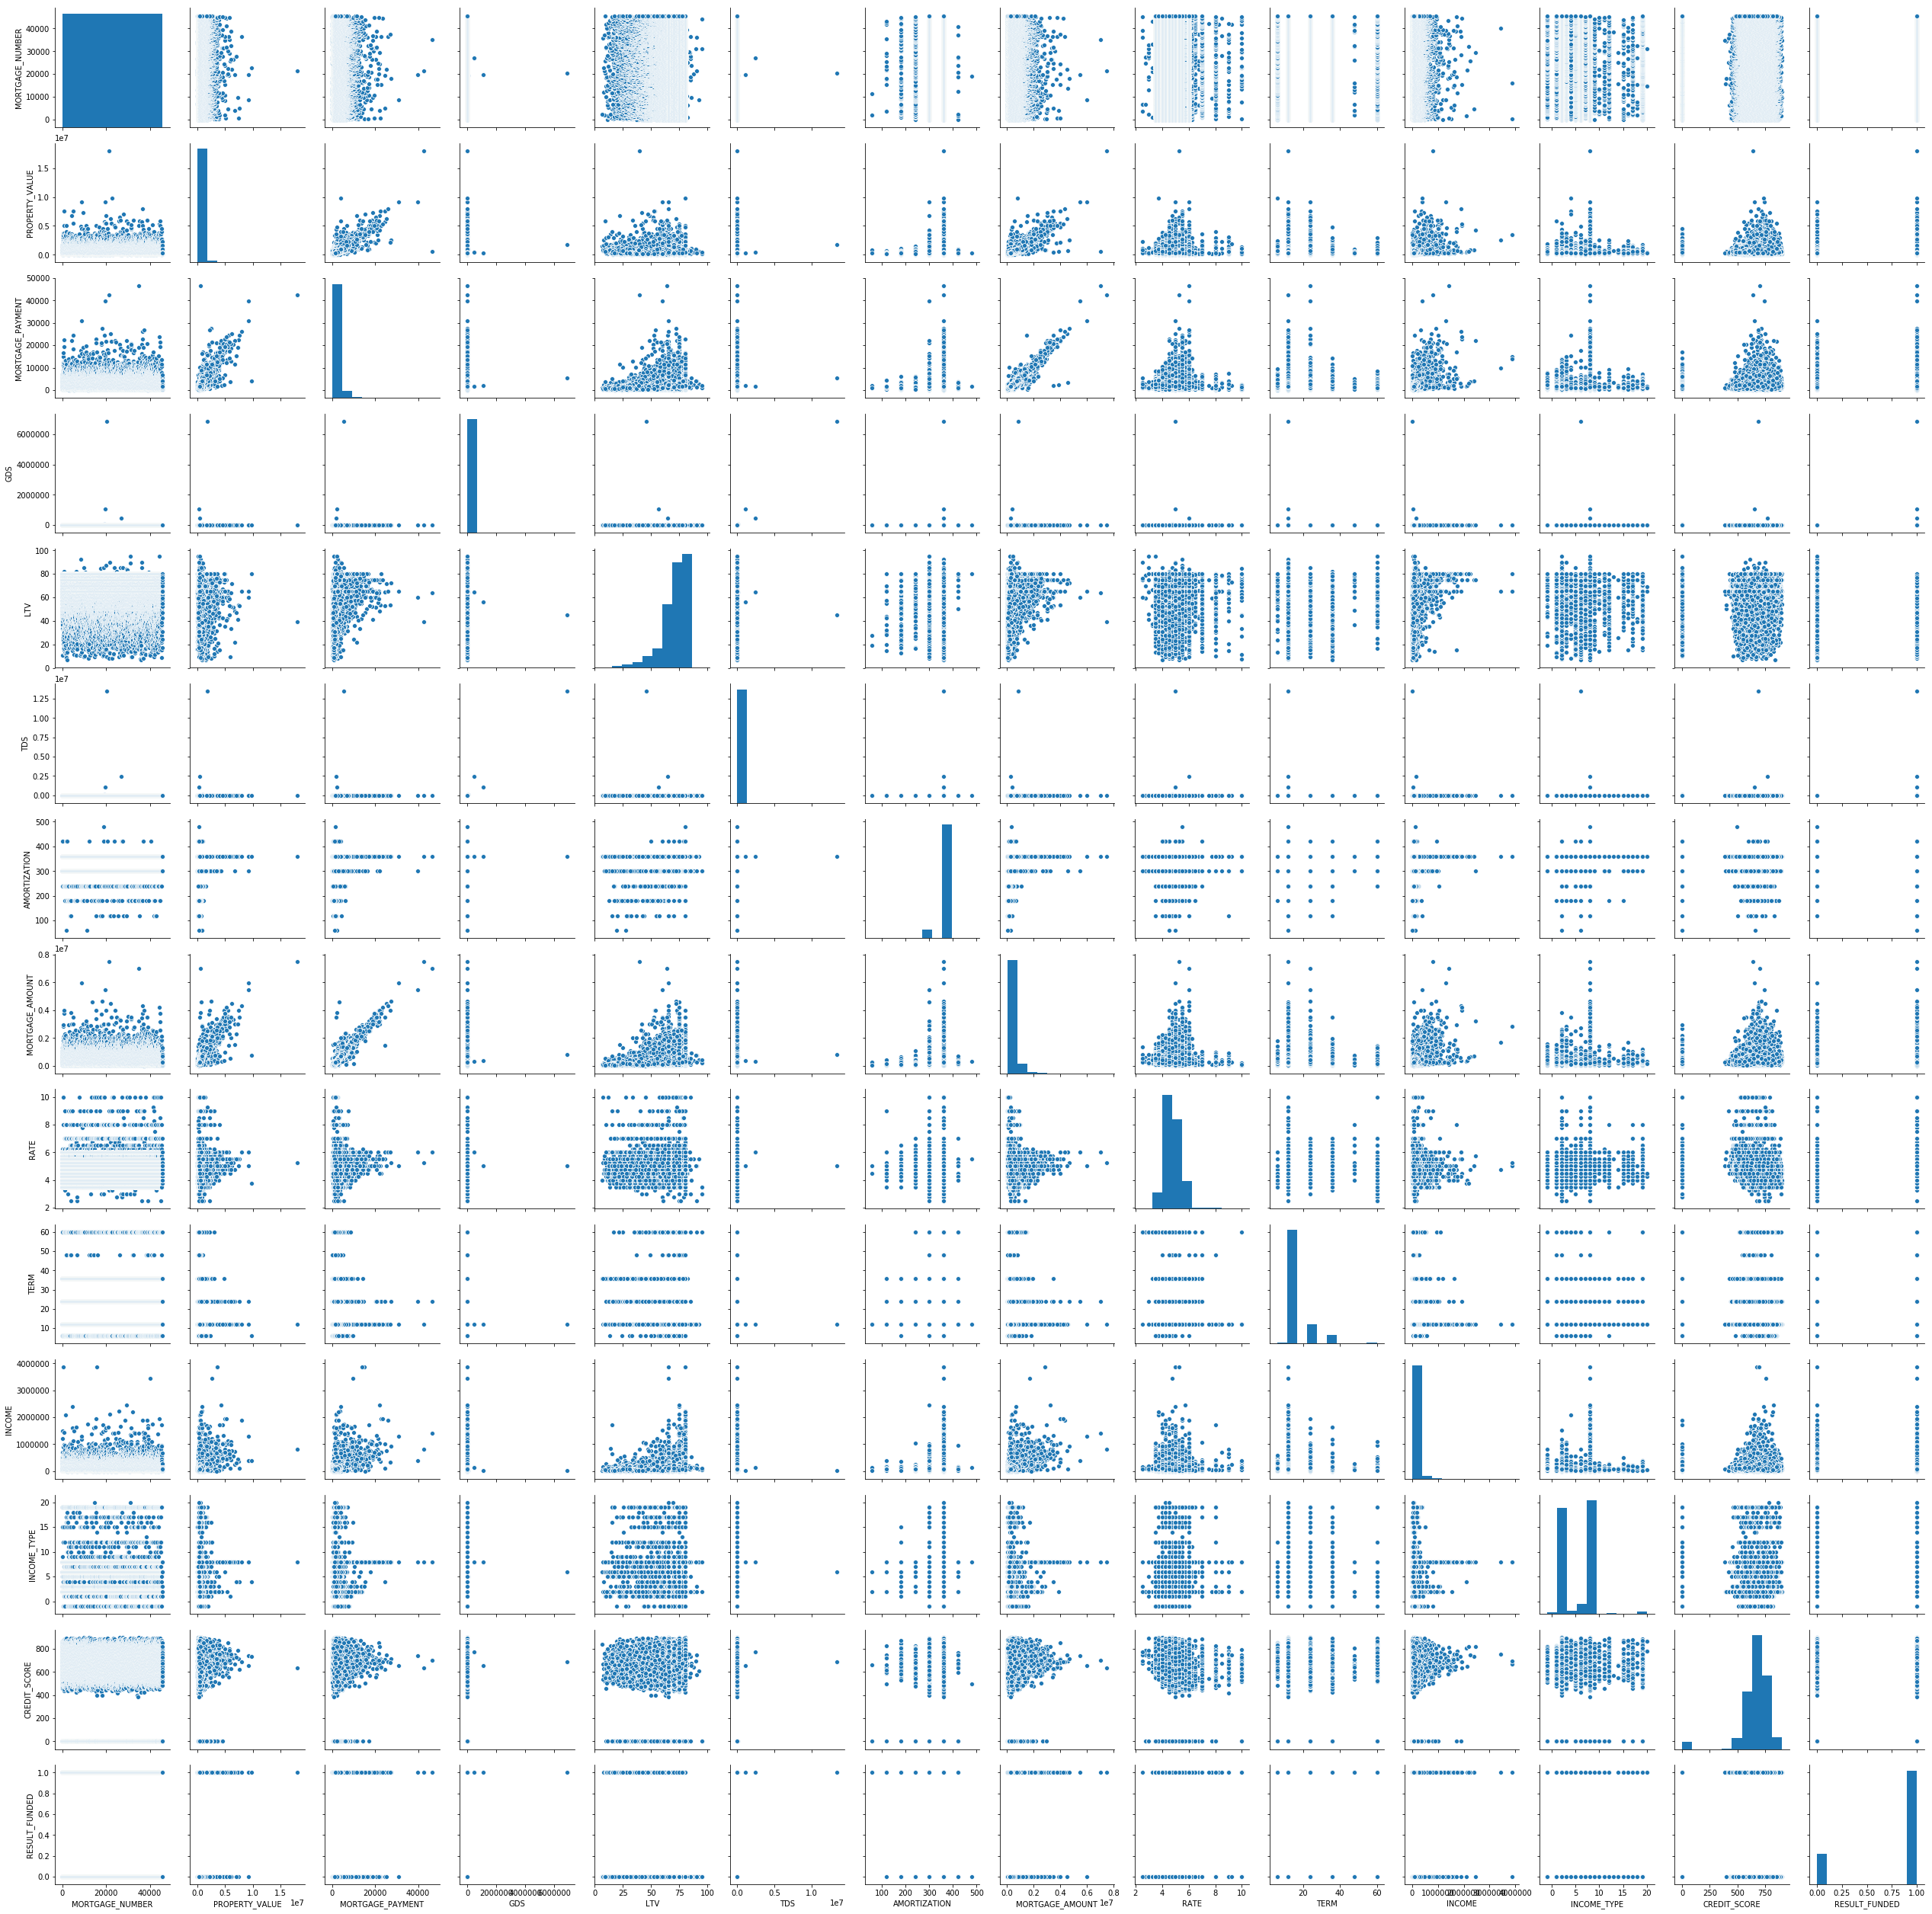

In [100]:
# Посмотрю на распределения количественных признаков
sns.pairplot(train)